# Import Basic libraries

In [87]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import data

In [88]:
# data import 
file_path = r'S:\Projects\IABAC Project work\INX_Future_Inc_Employee_Performance_CDS_Project.xls'

data = pd.read_excel(file_path)

In [89]:
data

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,...,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,...,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,...,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,...,2,9,3,4,8,7,7,7,No,3


# Outlier Detection:

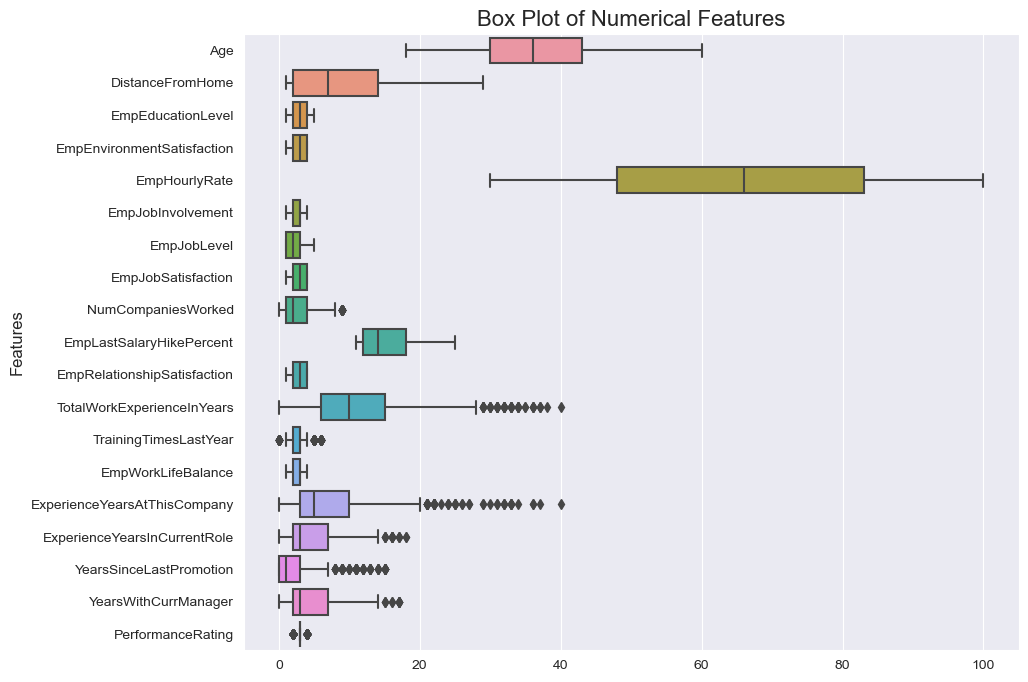

In [90]:
# Visualize outliers using horizontal box plots
plt.figure(figsize=(10, 8))
sns.boxplot(data=data, orient='h')
plt.title('Box Plot of Numerical Features', fontsize=16)
plt.ylabel('Features', fontsize=12)
plt.show()

- These columns are having outliers: 'NumCompaniesWorked', 'TotalWorkExperienceInYears', 'TrainingTimesLastYear', 'ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'.

# Outlier Handling:

## NumCompaniesWorked Outlier:

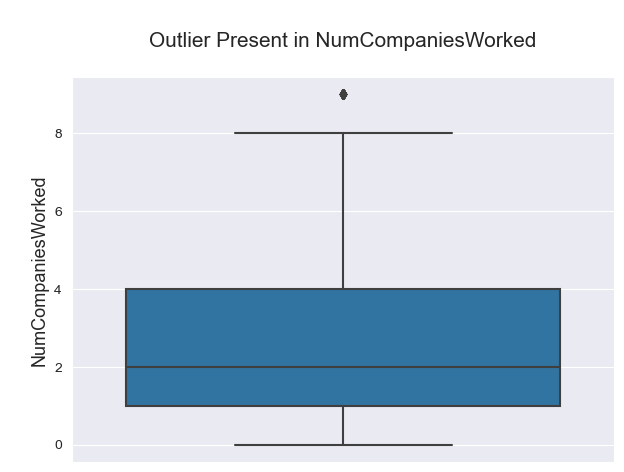

In [91]:
# Outlier Present in NumCompaniesWorked
plt.figure(figsize=(7, 5))
sns.set_style("darkgrid")
sns.boxplot(y=data["NumCompaniesWorked"]) 
plt.title("\nOutlier Present in NumCompaniesWorked\n", fontsize=15)
plt.ylabel("\nNumCompaniesWorked", fontsize=13)  # Use ylabel for horizontal boxplot
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()


In [92]:
#Outlier value present in NumCompaniesWorked using Z-score method
mean = np.mean(data["NumCompaniesWorked"]) 
std = np.std(data["NumCompaniesWorked"]) 
threshold = 3.5
outlier = [] 
for i in data["NumCompaniesWorked"]: 
    z = (i-mean)/std 
    if z > threshold: 
        outlier.append(i) 
print('\033[1mOutlier in NumCompaniesWorked  are ', outlier) 

Outlier in NumCompaniesWorked  are  []


In [93]:
# Replace outliers with values within IQR range
Q1 = np.percentile(data["NumCompaniesWorked"], 25)
Q3 = np.percentile(data["NumCompaniesWorked"], 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


data.loc[data["NumCompaniesWorked"] > upper_bound, "NumCompaniesWorked"] = upper_bound
data.loc[data["NumCompaniesWorked"] < lower_bound, "NumCompaniesWorked"] = lower_bound

C:\Users\Mihir\AppData\Local\Temp\ipykernel_29956\4240149945.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '8.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data["NumCompaniesWorked"] > upper_bound, "NumCompaniesWorked"] = upper_bound


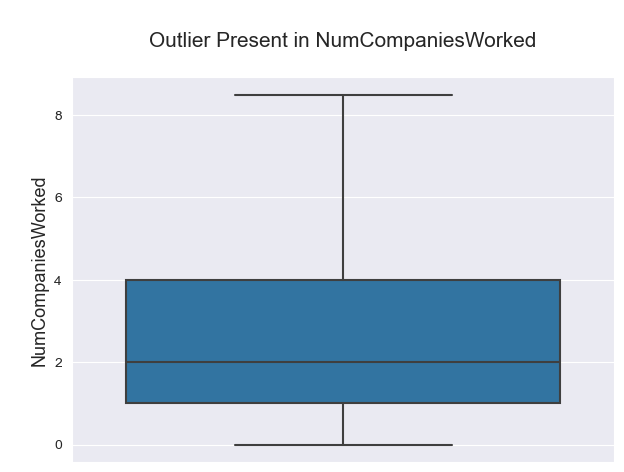

In [94]:
# NumCompaniesWorked :After replacing the outlier using IQR_range
plt.figure(figsize=(7, 5))
sns.set_style("darkgrid")
sns.boxplot(y=data["NumCompaniesWorked"]) 
plt.title("\nOutlier Present in NumCompaniesWorked\n", fontsize=15)
plt.ylabel("\nNumCompaniesWorked", fontsize=13)  # Use ylabel for horizontal boxplot
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()

## TotalWorkExperienceInYears outlier

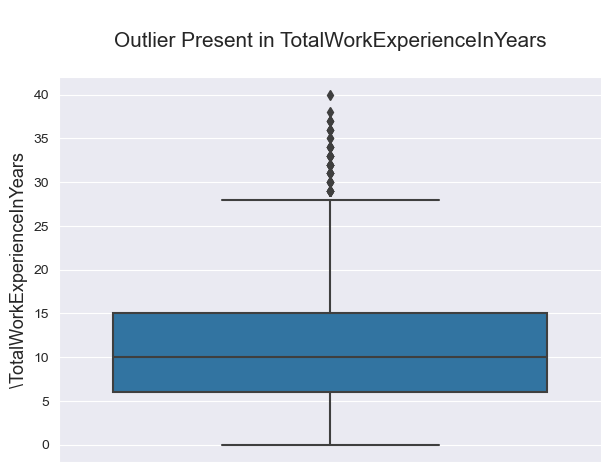

In [95]:
# Outlier Present in TotalWorkExperienceInYears
plt.figure(figsize=(7, 5))
sns.set_style("darkgrid")
sns.boxplot(y=data["TotalWorkExperienceInYears"]) 
plt.title("\nOutlier Present in TotalWorkExperienceInYears\n", fontsize=15)
plt.ylabel("\TotalWorkExperienceInYears", fontsize=13)  # Use ylabel for horizontal boxplot
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()


In [96]:
# Outlier value present in TotalWorkExperienceInYears using Z-score method
mean = np.mean(data["TotalWorkExperienceInYears"]) 
std = np.std(data["TotalWorkExperienceInYears"]) 
threshold = 3.5
outlier = [] 
for i in data["TotalWorkExperienceInYears"]: 
    z = (i-mean)/std 
    if z > threshold: 
        outlier.append(i) 
print('outlier in dataset is', outlier) 

outlier in dataset is [40]


In [97]:
# Replace outliers with values within IQR range
Q1 = np.percentile(data["TotalWorkExperienceInYears"], 25)
Q3 = np.percentile(data["TotalWorkExperienceInYears"], 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


data.loc[data["TotalWorkExperienceInYears"] > upper_bound, "TotalWorkExperienceInYears"] = upper_bound
data.loc[data["TotalWorkExperienceInYears"] < lower_bound, "TotalWorkExperienceInYears"] = lower_bound


C:\Users\Mihir\AppData\Local\Temp\ipykernel_29956\2317906602.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '28.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data["TotalWorkExperienceInYears"] > upper_bound, "TotalWorkExperienceInYears"] = upper_bound


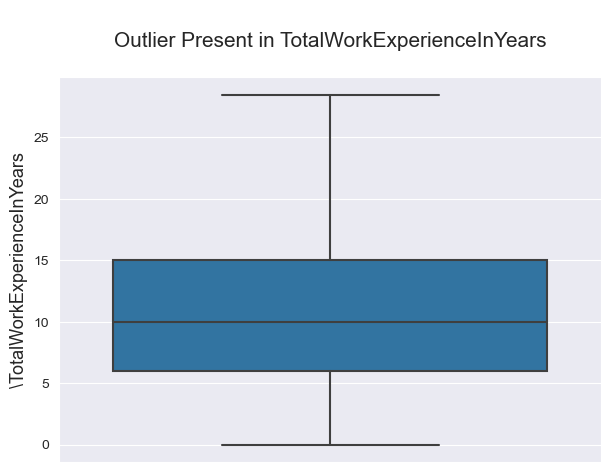

In [98]:
# TotalWorkExperienceInYears :After replacing the outlier using IQR_range
plt.figure(figsize=(7, 5))
sns.set_style("darkgrid")
sns.boxplot(y=data["TotalWorkExperienceInYears"]) 
plt.title("\nOutlier Present in TotalWorkExperienceInYears\n", fontsize=15)
plt.ylabel("\TotalWorkExperienceInYears", fontsize=13)  # Use ylabel for horizontal boxplot
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()

## TrainingTimesLastYear outlier

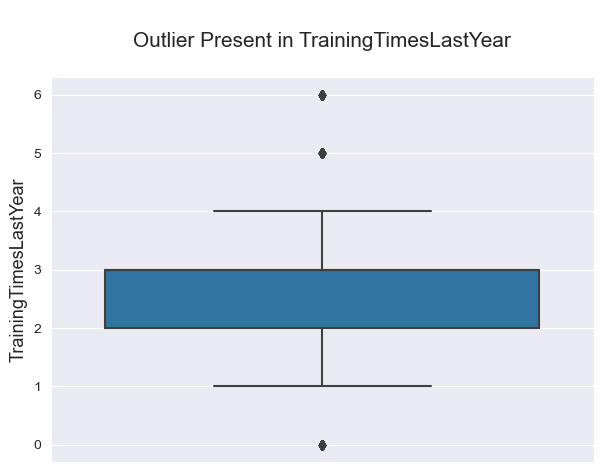

In [99]:
# Outlier Present in TrainingTimesLastYear
plt.figure(figsize=(7, 5))
sns.set_style("darkgrid")
sns.boxplot(y=data["TrainingTimesLastYear"]) 
plt.title("\nOutlier Present in TrainingTimesLastYear\n", fontsize=15)
plt.ylabel("TrainingTimesLastYear", fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()


In [100]:
# Outlier value present in TrainingTimesLastYear using Z-score method
mean = np.mean(data["TrainingTimesLastYear"]) 
std = np.std(data["TrainingTimesLastYear"]) 
threshold = 3.5
outlier = [] 
for i in data["TrainingTimesLastYear"]: 
    z = (i-mean)/std 
    if z > threshold: 
        outlier.append(i) 
print('outlier in dataset is', outlier) 

outlier in dataset is []


In [101]:
# Replace outliers with values within IQR range
Q1 = np.percentile(data["TrainingTimesLastYear"], 25)
Q3 = np.percentile(data["TrainingTimesLastYear"], 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


data.loc[data["TrainingTimesLastYear"] > upper_bound, "TrainingTimesLastYear"] = upper_bound
data.loc[data["TrainingTimesLastYear"] < lower_bound, "TrainingTimesLastYear"] = lower_bound

C:\Users\Mihir\AppData\Local\Temp\ipykernel_29956\3204218526.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '4.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data["TrainingTimesLastYear"] > upper_bound, "TrainingTimesLastYear"] = upper_bound


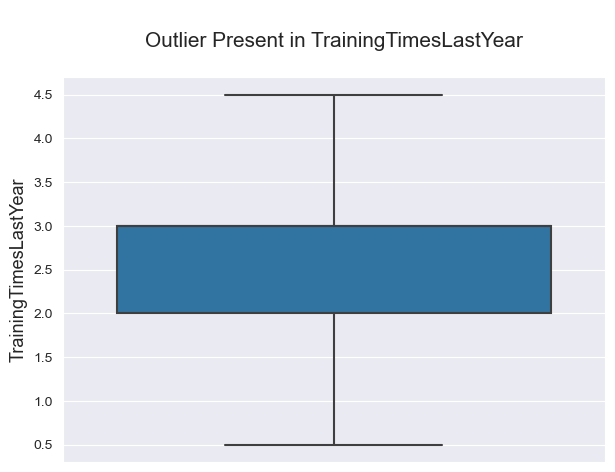

In [102]:
# TrainingTimesLastYear :After replacing the outlier using IQR_range
plt.figure(figsize=(7, 5))
sns.set_style("darkgrid")
sns.boxplot(y=data["TrainingTimesLastYear"]) 
plt.title("\nOutlier Present in TrainingTimesLastYear\n", fontsize=15)
plt.ylabel("TrainingTimesLastYear", fontsize=13)  # Use ylabel for horizontal boxplot
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()


## ExperienceYearsAtThisCompany

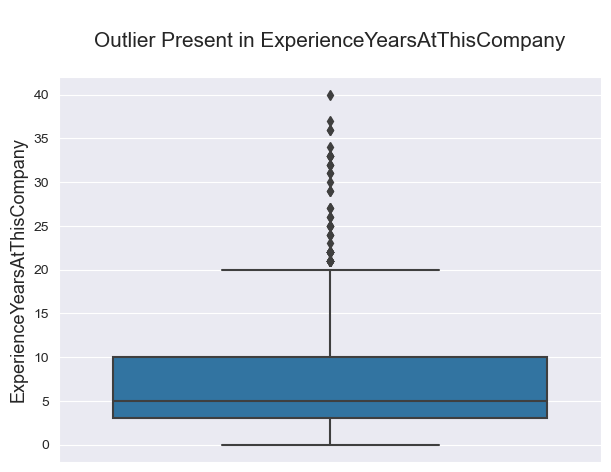

In [103]:
# Outlier Present in ExperienceYearsAtThisCompany
plt.figure(figsize=(7, 5))
sns.set_style("darkgrid")
sns.boxplot(y=data["ExperienceYearsAtThisCompany"]) 
plt.title("\nOutlier Present in ExperienceYearsAtThisCompany\n", fontsize=15)
plt.ylabel("ExperienceYearsAtThisCompany", fontsize=13)  # Use ylabel for horizontal boxplot
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()


In [104]:
# Outlier value present in ExperienceYearsAtThisCompany using Z-score method
mean = np.mean(data["ExperienceYearsAtThisCompany"]) 
std = np.std(data["ExperienceYearsAtThisCompany"]) 
threshold = 3.5
outlier = [] 
for i in data["ExperienceYearsAtThisCompany"]: 
    z = (i-mean)/std 
    if z > threshold: 
        outlier.append(i) 
print('outlier in dataset is', outlier) 

outlier in dataset is [34, 31, 32, 33, 29, 33, 32, 33, 36, 30, 37, 40, 33, 33, 36, 29, 31, 32]


In [105]:
# Replace outliers with values within IQR range
Q1 = np.percentile(data["ExperienceYearsAtThisCompany"], 25)
Q3 = np.percentile(data["ExperienceYearsAtThisCompany"], 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


data.loc[data["ExperienceYearsAtThisCompany"] > upper_bound, "ExperienceYearsAtThisCompany"] = upper_bound
data.loc[data["ExperienceYearsAtThisCompany"] < lower_bound, "ExperienceYearsAtThisCompany"] = lower_bound

C:\Users\Mihir\AppData\Local\Temp\ipykernel_29956\2476392724.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '20.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data["ExperienceYearsAtThisCompany"] > upper_bound, "ExperienceYearsAtThisCompany"] = upper_bound


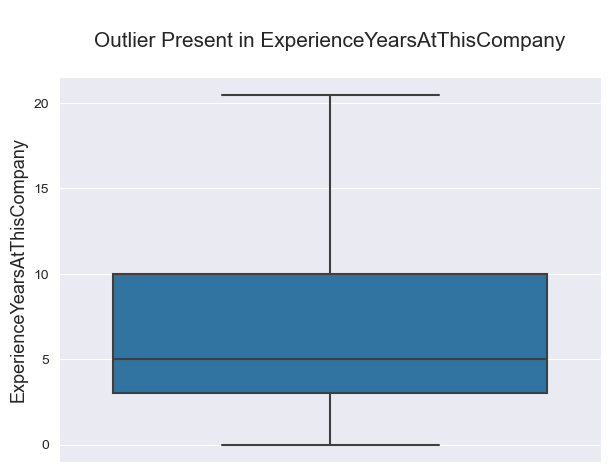

In [106]:
# ExperienceYearsAtThisCompany :After replacing the outlier using IQR_range
plt.figure(figsize=(7, 5))
sns.set_style("darkgrid")
sns.boxplot(y=data["ExperienceYearsAtThisCompany"]) 
plt.title("\nOutlier Present in ExperienceYearsAtThisCompany\n", fontsize=15)
plt.ylabel("ExperienceYearsAtThisCompany", fontsize=13)  # Use ylabel for horizontal boxplot
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()

## ExperienceYearsInCurrentRole

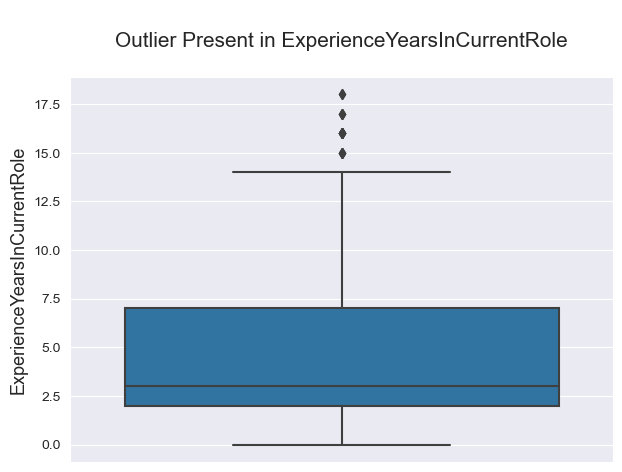

In [107]:
# Outlier Present in ExperienceYearsInCurrentRole
plt.figure(figsize=(7, 5))
sns.set_style("darkgrid")
sns.boxplot(y=data["ExperienceYearsInCurrentRole"]) 
plt.title("\nOutlier Present in ExperienceYearsInCurrentRole\n", fontsize=15)
plt.ylabel("ExperienceYearsInCurrentRole", fontsize=13)  # Use ylabel for horizontal boxplot
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()


In [108]:
# Outlier value present in ExperienceYearsInCurrentRole using Z-score method
mean = np.mean(data["ExperienceYearsInCurrentRole"]) 
std = np.std(data["ExperienceYearsInCurrentRole"]) 
threshold = 3.5
outlier = [] 
for i in data["ExperienceYearsInCurrentRole"]: 
    z = (i-mean)/std 
    if z > threshold: 
        outlier.append(i) 
print('outlier in dataset is', outlier) 

outlier in dataset is [17, 17, 18, 18, 17]


In [109]:
# Replace outliers with values within IQR range
Q1 = np.percentile(data["ExperienceYearsInCurrentRole"], 25)
Q3 = np.percentile(data["ExperienceYearsInCurrentRole"], 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


data.loc[data["ExperienceYearsInCurrentRole"] > upper_bound, "ExperienceYearsInCurrentRole"] = upper_bound
data.loc[data["ExperienceYearsInCurrentRole"] < lower_bound, "ExperienceYearsInCurrentRole"] = lower_bound

C:\Users\Mihir\AppData\Local\Temp\ipykernel_29956\1048997493.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '14.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data["ExperienceYearsInCurrentRole"] > upper_bound, "ExperienceYearsInCurrentRole"] = upper_bound


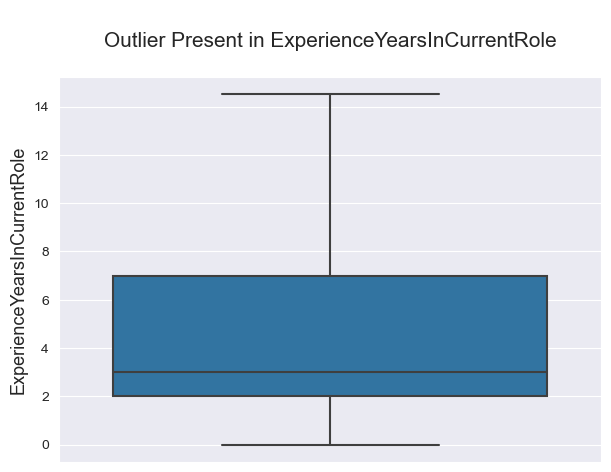

In [110]:
# ExperienceYearsInCurrentRole :After replacing the outlier using IQR_range
plt.figure(figsize=(7, 5))
sns.set_style("darkgrid")
sns.boxplot(y=data["ExperienceYearsInCurrentRole"]) 
plt.title("\nOutlier Present in ExperienceYearsInCurrentRole\n", fontsize=15)
plt.ylabel("ExperienceYearsInCurrentRole", fontsize=13)  # Use ylabel for horizontal boxplot
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()

## YearsSinceLastPromotion

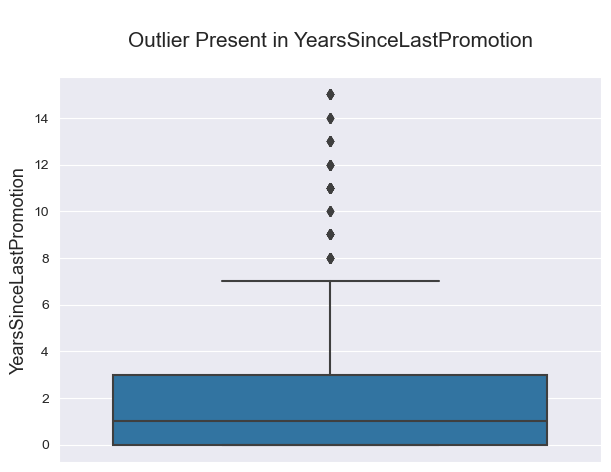

In [111]:
# Outlier Present in YearsSinceLastPromotion
plt.figure(figsize=(7, 5))
sns.set_style("darkgrid")
sns.boxplot(y=data["YearsSinceLastPromotion"]) 
plt.title("\nOutlier Present in YearsSinceLastPromotion\n", fontsize=15)
plt.ylabel("YearsSinceLastPromotion", fontsize=13)  # Use ylabel for horizontal boxplot
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()


In [112]:
# Outlier value present in YearsSinceLastPromotion using Z-score method
mean = np.mean(data["YearsSinceLastPromotion"]) 
std = np.std(data["YearsSinceLastPromotion"]) 
threshold = 3.5
outlier = [] 
for i in data["YearsSinceLastPromotion"]: 
    z = (i-mean)/std 
    if z > threshold: 
        outlier.append(i) 
print('outlier in dataset is', outlier) 

outlier in dataset is [14, 15, 15, 15, 14, 15, 15, 15, 14, 14, 14, 15, 15, 15, 15, 15]


In [113]:
# Replace outliers with values within IQR range
Q1 = np.percentile(data["YearsSinceLastPromotion"], 25)
Q3 = np.percentile(data["YearsSinceLastPromotion"], 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


data.loc[data["YearsSinceLastPromotion"] > upper_bound, "YearsSinceLastPromotion"] = upper_bound
data.loc[data["YearsSinceLastPromotion"] < lower_bound, "YearsSinceLastPromotion"] = lower_bound

C:\Users\Mihir\AppData\Local\Temp\ipykernel_29956\2393028811.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '7.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data["YearsSinceLastPromotion"] > upper_bound, "YearsSinceLastPromotion"] = upper_bound


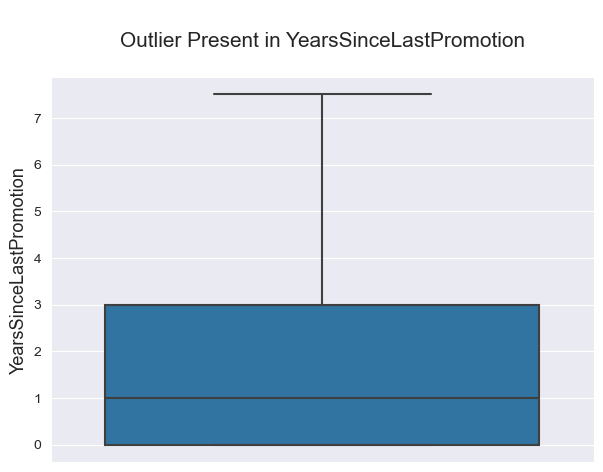

In [114]:
# YearsSinceLastPromotion :After replacing the outlier using IQR_range
plt.figure(figsize=(7, 5))
sns.set_style("darkgrid")
sns.boxplot(y=data["YearsSinceLastPromotion"]) 
plt.title("\nOutlier Present in YearsSinceLastPromotion\n", fontsize=15)
plt.ylabel("YearsSinceLastPromotion", fontsize=13)  # Use ylabel for horizontal boxplot
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()

## YearsWithCurrManager

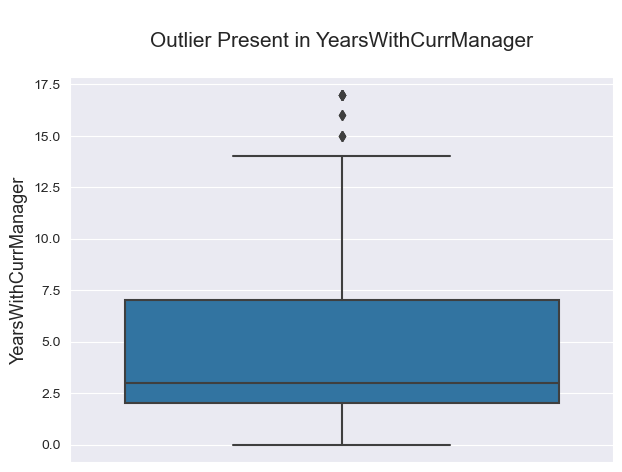

In [115]:
# Outlier Present in YearsWithCurrManager
plt.figure(figsize=(7, 5))
sns.set_style("darkgrid")
sns.boxplot(y=data["YearsWithCurrManager"]) 
plt.title("\nOutlier Present in YearsWithCurrManager\n", fontsize=15)
plt.ylabel("YearsWithCurrManager", fontsize=13)  # Use ylabel for horizontal boxplot
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()


In [116]:
# Outlier value present in YearsWithCurrManager using Z-score method
mean = np.mean(data["YearsWithCurrManager"]) 
std = np.std(data["YearsWithCurrManager"]) 
threshold = 3.5
outlier = [] 
for i in data["YearsWithCurrManager"]: 
    z = (i-mean)/std 
    if z > threshold: 
        outlier.append(i) 
print('outlier in dataset is', outlier) 

outlier in dataset is [17, 17, 17, 17, 17, 17]


In [117]:
# Replace outliers with values within IQR range
Q1 = np.percentile(data["YearsWithCurrManager"], 25)
Q3 = np.percentile(data["YearsWithCurrManager"], 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


data.loc[data["YearsWithCurrManager"] > upper_bound, "YearsWithCurrManager"] = upper_bound
data.loc[data["YearsWithCurrManager"] < lower_bound, "YearsWithCurrManager"] = lower_bound

C:\Users\Mihir\AppData\Local\Temp\ipykernel_29956\3714637474.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '14.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data["YearsWithCurrManager"] > upper_bound, "YearsWithCurrManager"] = upper_bound


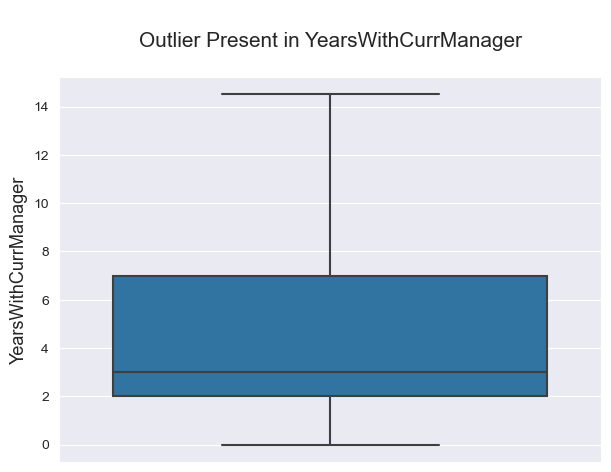

In [118]:
# YearsWithCurrManager :After replacing the outlier using IQR_range
plt.figure(figsize=(7, 5))
sns.set_style("darkgrid")
sns.boxplot(y=data["YearsWithCurrManager"]) 
plt.title("\nOutlier Present in YearsWithCurrManager\n", fontsize=15)
plt.ylabel("YearsWithCurrManager", fontsize=13)  # Use ylabel for horizontal boxplot
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()

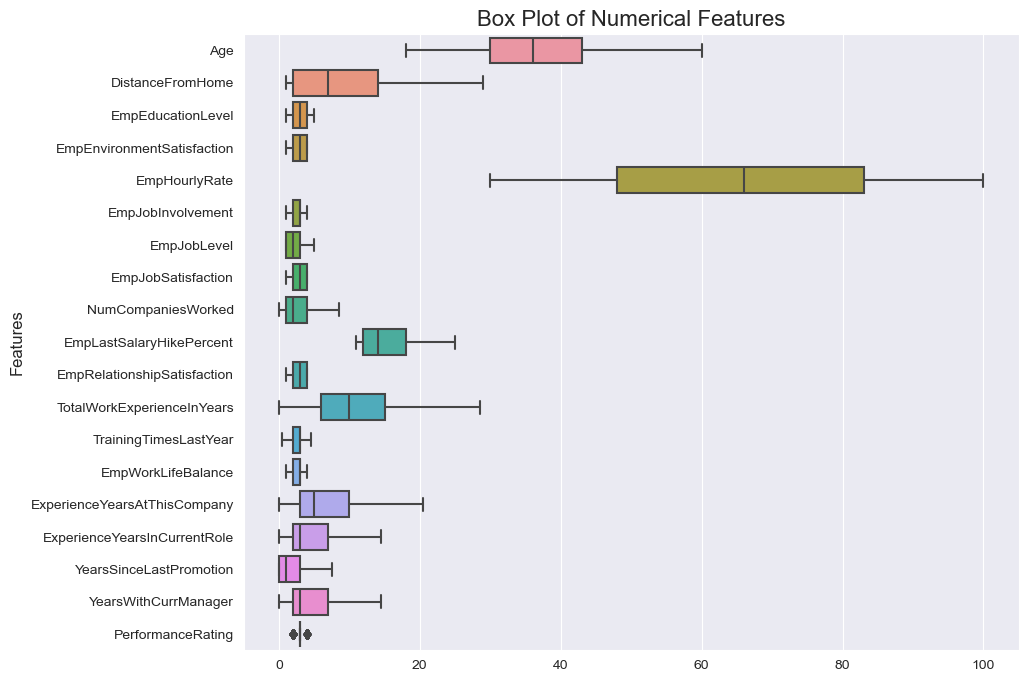

In [119]:
# Visualize boxplot after handling outliers
plt.figure(figsize=(10, 8))
sns.boxplot(data=data, orient='h')
plt.title('Box Plot of Numerical Features', fontsize=16)
plt.ylabel('Features', fontsize=12)
plt.show()

# Label Encoding

In [120]:
# Using label encoder to convert the categorical data to numerical data
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()

data.Gender=lc.fit_transform(data.Gender)
data.MaritalStatus=lc.fit_transform(data.MaritalStatus)
data.EducationBackground=lc.fit_transform(data.EducationBackground)
data.EmpDepartment=lc.fit_transform(data.EmpDepartment)
data.EmpJobRole=lc.fit_transform(data.EmpJobRole)
data.BusinessTravelFrequency=lc.fit_transform(data.BusinessTravelFrequency)
data.Attrition=lc.fit_transform(data.Attrition)
data.OverTime=lc.fit_transform(data.OverTime)

In [121]:
# dataset after Label Encoding:
data

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,1,2,2,5,13,2,10,3,...,4,10.0,2.0,2,10.0,7.0,0.0,8.0,0,3
1,E1001006,47,1,2,2,5,13,2,14,4,...,4,20.0,2.0,3,7.0,7.0,1.0,7.0,0,3
2,E1001007,40,1,1,1,5,13,1,5,4,...,3,20.0,2.0,3,18.0,13.0,1.0,12.0,0,4
3,E1001009,41,1,0,0,3,8,2,10,4,...,2,23.0,2.0,2,20.5,6.0,7.5,6.0,0,3
4,E1001010,60,1,2,2,5,13,2,16,4,...,4,10.0,1.0,3,2.0,2.0,2.0,2.0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,E100992,27,0,3,0,5,13,1,3,1,...,2,6.0,3.0,3,6.0,5.0,0.0,4.0,0,4
1196,E100993,37,1,1,2,1,15,2,10,2,...,1,4.0,2.0,3,1.0,0.0,0.0,0.0,0,3
1197,E100994,50,1,3,1,1,15,2,28,1,...,3,20.0,3.0,3,20.0,8.0,3.0,8.0,0,3
1198,E100995,34,0,3,2,0,1,2,9,3,...,2,9.0,3.0,4,8.0,7.0,7.0,7.0,0,3


# defing Independent variables as x and Dependent variable(Target variable ) as y

In [122]:
x = data.iloc[:,1:]
x

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,1,2,2,5,13,2,10,3,4,...,4,10.0,2.0,2,10.0,7.0,0.0,8.0,0,3
1,47,1,2,2,5,13,2,14,4,4,...,4,20.0,2.0,3,7.0,7.0,1.0,7.0,0,3
2,40,1,1,1,5,13,1,5,4,4,...,3,20.0,2.0,3,18.0,13.0,1.0,12.0,0,4
3,41,1,0,0,3,8,2,10,4,2,...,2,23.0,2.0,2,20.5,6.0,7.5,6.0,0,3
4,60,1,2,2,5,13,2,16,4,1,...,4,10.0,1.0,3,2.0,2.0,2.0,2.0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,27,0,3,0,5,13,1,3,1,4,...,2,6.0,3.0,3,6.0,5.0,0.0,4.0,0,4
1196,37,1,1,2,1,15,2,10,2,4,...,1,4.0,2.0,3,1.0,0.0,0.0,0.0,0,3
1197,50,1,3,1,1,15,2,28,1,4,...,3,20.0,3.0,3,20.0,8.0,3.0,8.0,0,3
1198,34,0,3,2,0,1,2,9,3,4,...,2,9.0,3.0,4,8.0,7.0,7.0,7.0,0,3


In [123]:
y = data['PerformanceRating']
y

0       3
1       3
2       4
3       3
4       3
       ..
1195    4
1196    3
1197    3
1198    3
1199    2
Name: PerformanceRating, Length: 1200, dtype: int64

## for a random forest classifier If I am balancing the performance rating, we're getting an accuracy of 1, so I have to comment down on the handling imbalance data part. you can use if you need.

# Imbalanced Class Detection

In [124]:

class_distribution = y.value_counts(normalize=True)
print(class_distribution)


PerformanceRating
3    0.728333
2    0.161667
4    0.110000
Name: proportion, dtype: float64


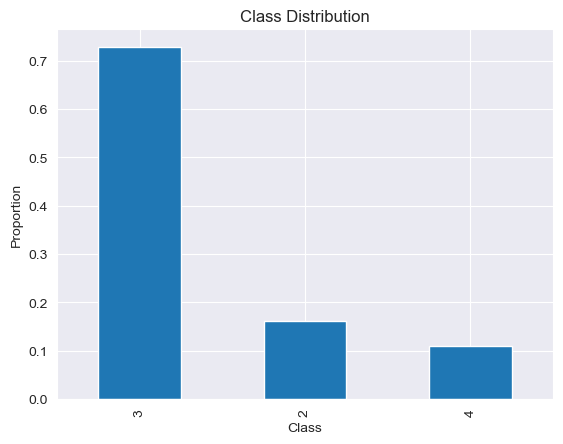

In [125]:
# Visualize Class Distribution:
class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Proportion')
plt.title('Class Distribution')
plt.show()

### imbalance data analysis
- The imbalance in the target variable "PerformanceRating" is evident, as Class 3 dominates the dataset with a high percentage.
- Classes 2 and 4 are minority classes, which could pose challenges during model training, especially for algorithms sensitive to class imbalance.

# Handling Imbalanced data

In [126]:
'''
from imblearn.over_sampling import RandomOverSampler
import pandas as pd

# Assuming x and y are your feature and target variables
oversampling = RandomOverSampler()
X_smote, y_smote = oversampling.fit_resample(x, y)

# Convert the oversampled data back to a DataFrame if needed
X_smote = pd.DataFrame(X_smote, columns=x.columns)  # Assuming x is a DataFrame with column names

# Now X_smote and y_smote contain the oversampled data
'''


'\nfrom imblearn.over_sampling import RandomOverSampler\nimport pandas as pd\n\n# Assuming x and y are your feature and target variables\noversampling = RandomOverSampler()\nX_smote, y_smote = oversampling.fit_resample(x, y)\n\n# Convert the oversampled data back to a DataFrame if needed\nX_smote = pd.DataFrame(X_smote, columns=x.columns)  # Assuming x is a DataFrame with column names\n\n# Now X_smote and y_smote contain the oversampled data\n'

In [127]:
#X_smote

In [128]:
#y_smote= pd.DataFrame(y_smote)
#y_smote.columns =["PerfomanceRating"]

In [129]:
#y_smote.value_counts()

In [130]:
'''
#Visualize Class Distribution: after balancing the data
class_distribution_balanced = y_smote.value_counts(normalize=True)
class_distribution_balanced.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Proportion')
plt.title('Class Distribution')
plt.show()
'''

"\n#Visualize Class Distribution: after balancing the data\nclass_distribution_balanced = y_smote.value_counts(normalize=True)\nclass_distribution_balanced.plot(kind='bar')\nplt.xlabel('Class')\nplt.ylabel('Proportion')\nplt.title('Class Distribution')\nplt.show()\n"

# Splitting the dataset into the Training set and Test set

In [131]:
## Creating training and testing data.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [132]:
x_train

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
331,58,1,1,0,4,12,2,23,4,1,...,4,2.0,3.0,3,2.0,2.0,2.0,2.0,0,2
409,31,0,3,2,3,6,2,8,2,4,...,4,8.0,3.0,3,3.0,2.0,0.0,2.0,0,3
76,36,1,1,1,5,13,2,1,2,2,...,4,18.0,1.0,2,18.0,14.0,4.0,11.0,0,3
868,19,1,2,2,5,14,2,22,1,4,...,4,0.0,2.0,2,0.0,0.0,0.0,0.0,1,3
138,30,1,4,0,5,13,2,8,2,3,...,1,10.0,2.0,4,8.0,4.0,7.0,7.0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,29,1,4,1,1,3,2,8,4,2,...,4,7.0,4.0,2,7.0,7.0,0.0,7.0,1,3
1095,30,0,5,2,5,13,2,12,3,2,...,2,6.0,4.5,3,5.0,4.0,4.0,4.0,0,2
1130,34,0,0,0,3,6,1,23,3,2,...,3,11.0,2.0,3,3.0,2.0,0.0,2.0,1,3
860,34,0,3,2,1,0,2,5,3,3,...,4,14.0,4.5,3,11.0,10.0,5.0,8.0,0,3


In [133]:
y_train

331     2
409     3
76      3
868     3
138     3
       ..
1044    3
1095    2
1130    3
860     3
1126    3
Name: PerformanceRating, Length: 960, dtype: int64

# RandomForestClassifier model creation.

In [134]:
from sklearn.ensemble import RandomForestClassifier

# Create Random Forest Classifier
RFC = RandomForestClassifier(random_state=42)

# Train the model
RFC.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [135]:
# Make predictions on the test data
y_pred = RFC.predict(x_test)
y_pred

array([3, 2, 3, 3, 3, 3, 3, 3, 2, 4, 3, 4, 3, 3, 2, 2, 3, 2, 4, 2, 3, 3,
       3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 3, 4, 3,
       3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3,
       3, 4, 3, 2, 2, 3, 4, 4, 3, 2, 3, 3, 3, 3, 3, 3, 4, 3, 4, 3, 3, 3,
       3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 3, 3, 3, 2,
       3, 2, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3,
       3, 3, 3, 3, 4, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2,
       3, 3, 3, 4, 3, 4, 3, 3, 3, 3, 3, 4, 3, 2, 3, 4, 3, 4, 3, 3, 4, 3,
       2, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 4, 2, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3,
       3, 2, 3, 3, 4, 4, 3, 3, 3, 2, 3, 3, 3, 3, 4, 3, 3, 2, 3, 3],
      dtype=int64)

In [136]:
y_test

1178    3
865     2
101     3
439     3
58      3
       ..
382     3
867     3
542     2
1193    3
874     3
Name: PerformanceRating, Length: 240, dtype: int64

In [137]:
# Calculate accuracy
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9958333333333333


In [138]:
# Print classification report
print('\nClassification Report:')
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           2       1.00      1.00      1.00        29
           3       0.99      1.00      1.00       184
           4       1.00      0.96      0.98        27

    accuracy                           1.00       240
   macro avg       1.00      0.99      0.99       240
weighted avg       1.00      1.00      1.00       240



In [139]:
# Print confusion matrix
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[ 29   0   0]
 [  0 184   0]
 [  0   1  26]]


In [141]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier()
cv_scores = cross_val_score(rf_classifier, x_train, y_train, cv=5)  # 5-fold cross-validation
print("Cross-Validation Scores:", cv_scores)


Cross-Validation Scores: [0.99479167 0.99479167 1.         0.99479167 0.984375  ]
